In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [108]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.17.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# load model

In [109]:
model_path = os.path.join(os.getcwd(),"model.keras")
model = tf.keras.models.load_model(model_path)
print(model_path)

/mnt/d/Projects/Fruit_n_Vegetable_Detector/backend/model.keras


In [110]:
test_dir = os.path.join(os.getcwd(),"fruit-and-vegetable-image-recognition","test")

BATCH_SIZE = 16
IMG_SIZE = (224, 224)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 359 files belonging to 36 classes.


In [111]:
class_names = test_dataset.class_names
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

# predicting multiple input

In [112]:
image_batch, label_batch = next(iter(test_dataset))
print(image_batch.shape, label_batch.shape)

(16, 224, 224, 3) (16,)


In [113]:
predicted_batch = model.predict(image_batch)
predicted_batch

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([[ -9.804829  ,  -8.738246  ,   4.2293353 ,  -9.860314  ,
         -6.657203  , -11.100731  ,  -8.385266  ,  -8.522415  ,
         -9.493718  ,  -6.580396  ,  -8.214589  ,  -6.3358774 ,
         -7.922576  ,  -7.6522923 ,  -8.3815975 ,  -9.013341  ,
         -7.0035787 ,  -8.139718  , -10.226894  ,  -8.741251  ,
         -6.785061  ,  -7.9515343 ,  -8.532077  ,  -5.3999553 ,
        -11.002716  ,  -5.8305254 ,  -9.442421  , -10.449502  ,
         -5.7184343 ,  -8.782684  ,  -7.889149  ,  -9.757687  ,
         -5.814098  , -11.299949  ,  -3.00241   ,  -7.1059537 ],
       [ -6.8341775 ,  -7.5177026 ,  -2.275033  ,  -7.4063597 ,
        -10.121433  ,  -5.6979957 ,  -1.1083403 , -11.254277  ,
          6.37302   ,  -4.95769   ,  -5.434075  ,  -5.4563484 ,
         -6.68223   ,  -3.9415002 ,  -8.788676  ,  -2.7843316 ,
         -9.16747   ,  -6.151716  ,  -6.748226  ,  -8.374743  ,
         -6.0067296 ,  -7.506504  ,  -3.460898  , -10.61657   ,
         -0.8353517 ,  -6.417255  ,  -8

In [114]:
len(predicted_batch)

16

In [115]:
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = [ class_names[i] for i in predicted_id]
print(predicted_label_batch)

['beetroot', 'chilli pepper', 'lettuce', 'watermelon', 'sweetcorn', 'banana', 'mango', 'jalepeno', 'garlic', 'tomato', 'pineapple', 'kiwi', 'eggplant', 'mango', 'cucumber', 'soy beans']


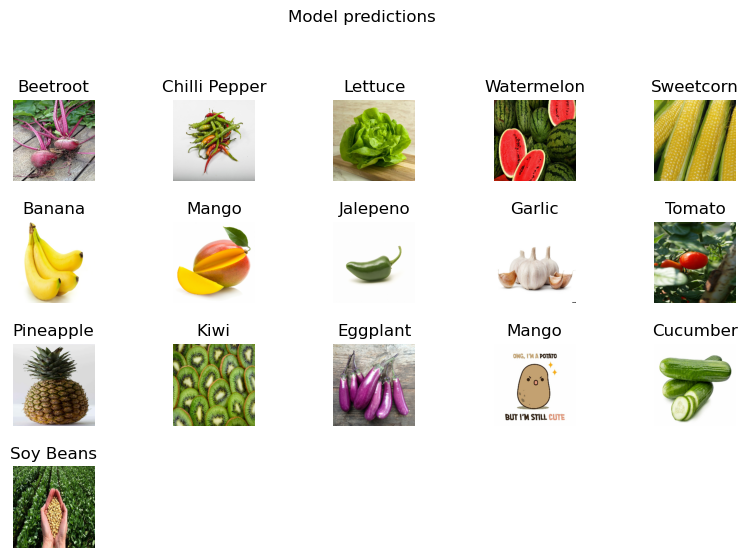

In [116]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

image_batch_np = image_batch.numpy()
predicted_label_batch_np = np.array(predicted_label_batch)

for n in range(len(predicted_label_batch)):
  plt.subplot(6,5,n+1)
  plt.imshow(np.clip(image_batch_np[n], 0, 255).astype("uint8"))
  plt.title(predicted_label_batch_np[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

# predict single input

In [121]:
IMG_SIZE = (224, 224)
image_path = os.path.join(test_dir,"apple","Image_1.jpg")
image = tf.keras.utils.load_img(image_path, target_size=IMG_SIZE)

image_array = tf.keras.utils.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

In [122]:
prediction = model.predict(image_array)
prediction_id = np.argmax(prediction[0])
vegetable = class_names[prediction_id]
vegetable

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'apple'